In [24]:
# Data Preprocessing
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RepeatedStratifiedKFold,
)



# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('CPET_processed.csv')
df

,Class,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope
0,0,-1.437322,1.533367,-0.147972,-0.022886,-0.399094,-0.682272,-0.072394,-0.383131,0.189349,0.941863,-0.383131,-0.300556,0.592106,-0.095783,0.319275
1,0,-0.079235,1.232517,-0.293120,-0.697917,-0.111746,-0.376875,-0.299815,-0.415058,-0.612227,-0.686442,0.670478,-0.267041,0.455812,-0.079819,1.309029
2,1,-0.617345,0.876966,-0.422140,1.728980,1.436739,1.423357,1.519551,0.957826,1.103147,1.564450,0.941863,0.520567,-0.517723,0.015964,1.628305
3,1,-0.053610,-0.052936,-0.067334,1.712908,1.676196,1.680533,1.711983,1.548486,1.552029,1.452703,-1.197283,1.727116,-0.167251,1.532522,-0.973790
4,1,-0.309853,0.439365,-0.212482,1.680764,1.484631,1.551945,1.432081,1.117464,1.247430,1.596377,1.340957,0.805447,1.760348,0.526804,-1.596377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,0.766367,-0.463186,0.513257,-1.003288,-0.638551,-0.730492,-1.087040,-0.638551,0.093160,-0.335239,-0.638551,-1.071406,-1.549670,-0.957826,-1.676196
213,2,0.996986,0.275265,1.077720,-1.485453,-1.293065,-1.502021,-1.366943,-0.750297,-0.676353,-0.734333,-0.367167,-1.037891,-1.101844,-0.846080,1.101500
214,2,0.253881,-0.928137,-0.486650,0.057475,-0.159638,-0.135773,-0.387284,-0.399094,-0.435880,0.191565,-1.053609,-0.535163,-1.101844,-0.223493,-0.191565
215,2,1.227604,1.423967,1.448654,-1.437237,-1.484631,-1.566315,-1.559375,-0.462949,-0.788574,-0.989754,-1.612341,-0.149737,-0.965549,0.446986,-1.548486


In [25]:
y = df["Class"]
x = df.drop('Class', axis=1)


# 70-30 Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2023)


1    67
2    34
0    29
3    21
Name: Class, dtype: int64


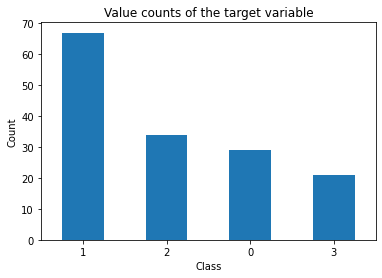

In [26]:
# Distribution of training set

print(y_train.value_counts())


y_train.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

1    28
0    22
2    11
3     5
Name: Class, dtype: int64


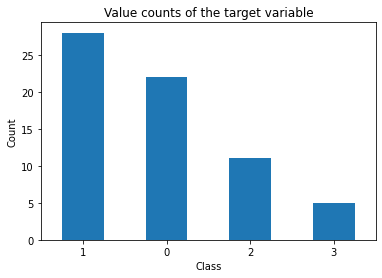

In [27]:
# Distribution of test set

print(y_test.value_counts())


y_test.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [28]:
# Resampling using SMOTE

sampler = SMOTE(random_state=0)

x_train, y_train = sampler.fit_resample(x_train, y_train)


# Distribution of train set

print(y_train.value_counts())

0    67
1    67
2    67
3    67
Name: Class, dtype: int64


In [29]:
# Train set

train_set = x_train
train_set["Class"] = y_train
train_set

,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope,Class
0,0.125760,-0.244386,-0.196355,-0.858639,-0.015964,-0.312581,-0.422272,-0.143674,-0.243502,-0.574696,-0.526804,-1.423316,-1.335492,-1.293065,0.893971,0
1,0.638246,0.466715,0.464874,-0.521123,-1.149392,-1.196624,-1.209497,-1.165355,-1.237457,-1.404812,-0.973790,-1.339528,-0.011485,-1.165355,-0.079819,0
2,-0.668593,-0.709337,-0.760818,-0.408618,-0.510841,-0.441169,0.032569,-0.670478,-0.483975,-0.878007,1.628305,0.637871,1.429346,0.686442,-0.878007,0
3,-1.667941,-0.982837,-1.663960,1.005733,-0.287348,-0.023258,0.277484,-0.303312,-0.227470,0.766261,0.000000,-0.451375,0.319517,-0.303312,0.909935,1
4,-0.540472,-1.529838,-1.212389,0.121763,0.335239,0.217844,-0.369790,-0.446986,-0.964921,-0.415058,0.367167,1.542782,-0.381428,1.309029,0.814152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,-0.390258,-0.838425,-0.766726,0.187160,0.679321,0.865185,1.224454,0.713897,0.920477,0.368990,-0.437012,0.279715,0.353426,0.381103,-0.828568,3
264,0.239367,0.766737,0.772350,-1.427421,-1.089593,-1.099022,-1.116156,-1.304676,-1.221948,-1.424311,-0.864425,-0.925705,-1.201648,-1.052120,-0.688489,3
265,0.248386,-0.580754,-0.055862,1.507677,0.884855,0.487326,1.157719,0.858461,1.151981,0.464582,-1.249653,0.244620,-1.263970,0.583653,-0.551725,3
266,0.660094,0.526681,0.881814,-0.275810,-1.253360,-1.093488,-1.042739,-1.535690,-1.516356,-1.257438,-0.027004,-0.681043,1.462283,-1.555638,0.458871,3


In [30]:
# Test set

test_set = x_test
test_set["Class"] = y_test

C:\Users\adria\AppData\Local\Temp/ipykernel_8216/2186091344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Class"] = y_test


In [31]:
# Exporting train and test set

train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)